Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


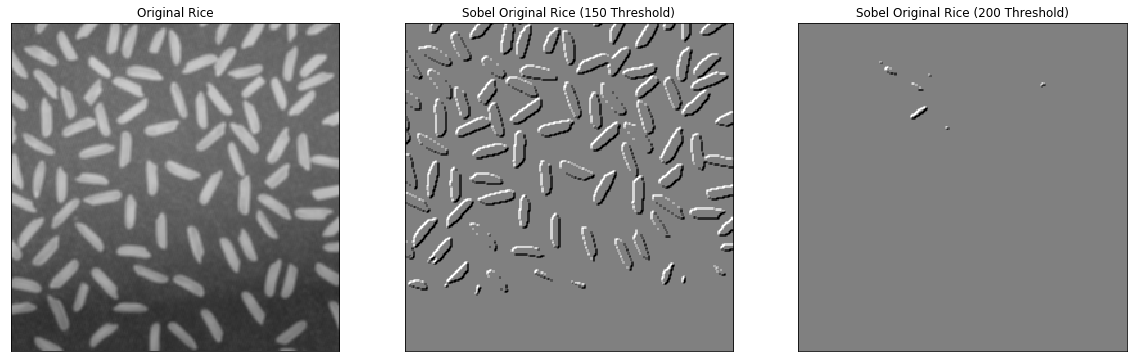

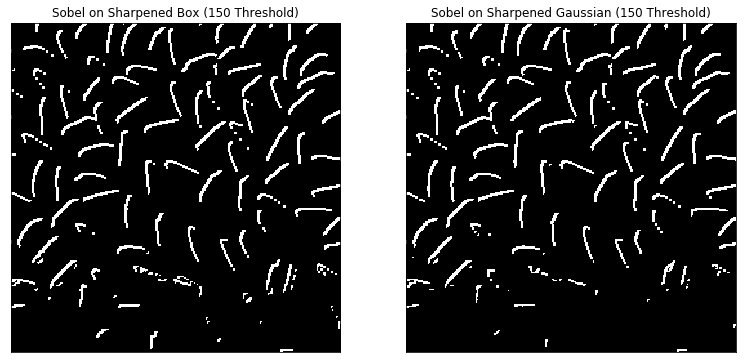

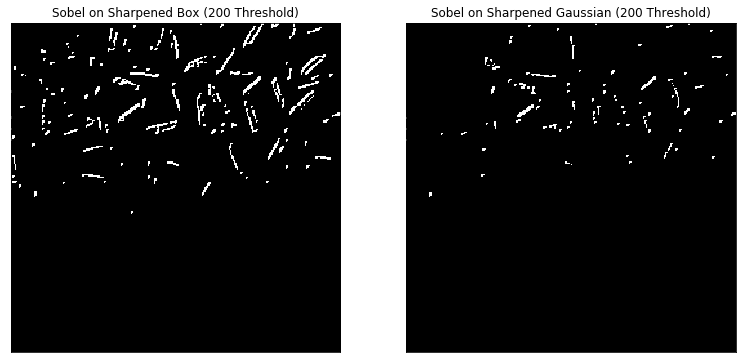

Simply using edge detection is not enough to detect all object edges. 
If we sharpen prior to using edge, then we can see more edges and notice: box filter is superior.


In [15]:
# Student Name: Nayem Alam
# Student ID:   260743549
# Assignment    1

import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage
from skimage import data, io, filters
import math

# --- Part 2.1: Q. 1 ---
rice_img = "./rice.png"

# blur and grayscale before thresholding
img = cv2.imread(rice_img)
rice_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# set threshold
THRESH_150 = 150
THRESH_200 = 200

# filter image using 5x5 Gaussian
img_gaussian = cv2.GaussianBlur(img, (5,5), math.sqrt(2))

# box filter image using 5x5
img_box = cv2.blur(img,(5,5))

# sharpen images
g_details = cv2.subtract(img, img_gaussian)
b_details = cv2.subtract(img, img_box)
g_sharpened = cv2.add(img, g_details)
b_sharpened = cv2.add(img, b_details)

# Apply threshold of 150
retval, t = cv2.threshold(rice_gray, THRESH_150, 255, cv2.THRESH_BINARY)
retval2, t2 = cv2.threshold(g_sharpened, THRESH_150, 255, cv2.THRESH_BINARY)
retval3, t3 = cv2.threshold(b_sharpened, THRESH_150, 255, cv2.THRESH_BINARY)

# Apply threshold of 200
retval4, thresh2 = cv2.threshold(rice_gray, THRESH_200, 255, cv2.THRESH_BINARY)
retval5, thresh3 = cv2.threshold(g_sharpened, THRESH_200, 255, cv2.THRESH_BINARY)
retval6, thresh4 = cv2.threshold(b_sharpened, THRESH_200, 255, cv2.THRESH_BINARY)

# Sobel Edge

# THRESH = 150

# Original
s_edgex = cv2.Sobel(t, cv2.CV_64F,1,0,ksize=3)
s_edgey = cv2.Sobel(t, cv2.CV_64F,0,1,ksize=3)
s_edge150 = s_edgex + s_edgey

# Gaussian Sharpened
s_edge_gsharpenedx = cv2.Sobel(t2, cv2.CV_64F,1,0,ksize=3)
s_edge_gsharpenedy = cv2.Sobel(t2, cv2.CV_64F,0,1,ksize=3)
s_edge_gsharpened = s_edge_gsharpenedx + s_edge_gsharpenedy

# Box Sharpened
s_edge_bsharpenedx = cv2.Sobel(t3, cv2.CV_64F,1,0,ksize=3)
s_edge_bsharpenedy = cv2.Sobel(t3, cv2.CV_64F,0,1,ksize=3)
s_edge_bsharpened = s_edge_bsharpenedx + s_edge_bsharpenedy

# THRESH = 200

# Original 
s_edgex1 = cv2.Sobel(thresh2, cv2.CV_64F,1,0,ksize=3)
s_edgey1 = cv2.Sobel(thresh2, cv2.CV_64F,0,1,ksize=3)
s_edge200 = s_edgex1 + s_edgey1

# Gaussian Sharpened
s_edge_gsharpenedx1 = cv2.Sobel(thresh3, cv2.CV_64F,1,0,ksize=3)
s_edge_gsharpenedy1 = cv2.Sobel(thresh3, cv2.CV_64F,0,1,ksize=3)
s_edge_gsharpened200 = s_edge_gsharpenedx1 + s_edge_gsharpenedy1

# Box Sharpened
s_edge_bsharpenedx1 = cv2.Sobel(thresh4, cv2.CV_64F,1,0,ksize=3)
s_edge_bsharpenedy1 = cv2.Sobel(thresh4, cv2.CV_64F,0,1,ksize=3)
s_edge_bsharpened200 = s_edge_bsharpenedx1 + s_edge_bsharpenedy1


# plot
plt.figure(figsize=(20, 20))

plt.subplot(131), plt.imshow(img, cmap="gray")
plt.title("Original Rice"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(s_edge150, cmap="gray")
plt.title("Sobel Original Rice (150 Threshold)"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(s_edge200, cmap="gray")
plt.title("Sobel Original Rice (200 Threshold)"), plt.xticks([]), plt.yticks([])


plt.figure(figsize=(13, 13))
plt.subplot(121), plt.imshow(s_edge_bsharpened, cmap="gray")
plt.title("Sobel on Sharpened Box (150 Threshold)"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(s_edge_gsharpened, cmap="gray")
plt.title("Sobel on Sharpened Gaussian (150 Threshold)"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(13, 13))
plt.subplot(121), plt.imshow(s_edge_bsharpened200, cmap="gray")
plt.title("Sobel on Sharpened Box (200 Threshold)"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(s_edge_gsharpened200, cmap="gray")
plt.title("Sobel on Sharpened Gaussian (200 Threshold)"), plt.xticks([]), plt.yticks([])

plt.show()

print("Simply using edge detection is not enough to detect all object edges. \nIf we sharpen prior to using edge, then we can see more edges and notice: box filter is superior.")

# --- END of Part 2.1: Q. 1 ---

# Simply using edge detection is not enough to detect all object edges. 
# If we sharpen prior to using edge, then we can see more edges and notice: box filter is superior at a lower threshold


In [91]:
# --- Part 2.1: Q. 2 ---
# --- END of Part 2.1: Q. 2 ---